<a href="https://colab.research.google.com/github/Technocolabs100/Data-Science-20-Feb-Optimizing-Lending-Club-s-Financial-Risk/blob/main/manasa_main_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
pip install -q keras

In [109]:
import keras

In [175]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

#Filter the unwanted warning
import warnings
warnings.simplefilter("ignore")

In [82]:
data_filepath="/content/drive/MyDrive/accepted_2007_to_2018Q4.csv.gz"

In [111]:
df_Accepted=pd.read_csv(data_filepath)

In [112]:
df_Accepted.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,...,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,...,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,...,218418.0,18696.0,6200.0,14877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,076xx,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,NaN,NaN,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,...,381215.0,52226.0,62500.0,18000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,w,0.00,0.00,...,439570.0,95768.0,20300.0,88097.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
2260696,88985880,NaN,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,Vice President,9 years,MORTGAGE,227000.0,Verified,Oct-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,NaN,907xx,CA,12.75,7.0,Feb-1995,705.0,709.0,1.0,9.0,NaN,5.0,0.0,8633.0,64.9,37.0,f,23252.59,23252.59,...,55970.0,28398.0,12300.0,42670.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260697,88224441,NaN,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,Program Manager,6 years,RENT,110000.0,Not Verified,Oct-2016,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,334xx,FL,18.30,0.0,Jul-1999,660.0,664.0,0.0,67.0,72.0,10.0,1.0,17641.0,68.1,31.0,f,0.00,0.00,...,84664.0,62426.0,20700.0,58764.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,Y,Mar-2019,ACTIVE,Mar-2019,10000.0,44.82,1.0
2260698,88215728,NaN,14000.0,14000.0,14000.0,60 months,14.49,329.33,C,C4,Customer Service Technician,10+ years,MORTGAGE,95000.0,Verified,Oct-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,NaN,770xx,TX,23.36,0.0,Jun-1996,660.0,664.0,1.0,37.0,NaN,8.0,0.0,7662.0,54.0,22.0,w,8456.12,8456.12,...,163804.0,44215.0,9500.0,34169.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260699,Total amount funded in policy code 1: 1465324575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2260700,Total amount funded in policy code 2: 521953170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
df_Accepted.shape

(2260701, 151)

In [87]:
data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 151 columns):
 #   Column                                      Non-Null Count    Dtype  
---  ------                                      --------------    -----  
 0   id                                          2260701 non-null  object 
 1   member_id                                   0 non-null        float64
 2   loan_amnt                                   2260668 non-null  float64
 3   funded_amnt                                 2260668 non-null  float64
 4   funded_amnt_inv                             2260668 non-null  float64
 5   term                                        2260668 non-null  object 
 6   int_rate                                    2260668 non-null  float64
 7   installment                                 2260668 non-null  float64
 8   grade                                       2260668 non-null  object 
 9   sub_grade                                   2260668 non-

In [114]:
df_Accepted.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,...,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260638e+06,1.102166e+06,359156.000000,2.260639e+06,2.260639e+06,2.260668e+06,2.258866e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260523e+06,580775.000000,2260668.0,1.207100e+05,120706.000000,2.260639e+06,2.190392e+06,2.190392e+06,1.394538e+06,...,2.190392e+06,2.190392e+06,2.190392e+06,2.190391e+06,2.190392e+06,2.202078e+06,2.107011e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190237e+06,2.185289e+06,2.259303e+06,2.260563e+06,2.190392e+06,2.210638e+06,2.210638e+06,2.190392e+06,1.080200e+05,108021.000000,108021.000000,108021.000000,108021.000000,108021.000000,106184.000000,108021.000000,108021.000000,108021.000000,108021.000000,35942.000000,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,7.025884e+02,5.768354e-01,3.454092e+01,72.312842,1.161240e+01,1.975278e-01,1.665846e+04,5.033770e+01,2.416255e+01,4.206891e+03,4.205965e+03,1.208256e+04,1.206439e+04,9.505772e+03,2.431388e+03,1.518453e+00,1.438791e+02,2.398257e+01,3.429346e+03,6.876610e+02,6.755397e+02,1.814580e-02,44.164220,1.0,1.236246e+05,19.251817,4.147942e-03,2.327317e+02,1.424922e+05,9.344199e-01,...,7.726402e+00,8.413439e+00,8.246523e+00,1.400463e+01,5.577951e+00,1.162813e+01,6.373958e-04,2.813652e-03,8.293767e-02,2.076755e+00,9.411458e+01,4.243513e+01,1.281935e-01,4.677109e-02,1.782428e+05,5.102294e+04,2.319377e+04,4.373201e+04,3.361728e+04,669.755603,673.755631,0.633256,1.538997,11.469455,58.169101,3.010554,12.533072,0.046352,0.077568,36.937928,3.0,155.045981,3.0,13.743886,454.798089,11636.883942,193.994321,5010.664267,47.780365,13.191322
std,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,8.672303e-01,3.301038e+01,3.301124e+01,8.859632e-01,2.190047e+01,26.464094,5.640861e+00,5.705150e-01,2.294831e+04,2.471307e+01,1.198753e+01,7.343239e+03,7.342333e+03,9.901383e+03,9.896992e+03,8.321852e+03,2.679738e+03,1.184159e+01,7.481640e+02,1.312256e+02,6.018248e+03,7.297044e+01,1.110976e+02,1.508131e-01,21.533121,0.0,7.416135e+04,7.822086,6.961656e-02,8.518462e+03,1.606926e+05,1.140700e+00,...,4.701430e+00,7.359114e+00,4.683928e+00,8.038868e+00,3.293434e+00,5.644027e+00,2.710643e-02,5.616522e-02,4.935732e-01,1.830711e+00,9.036140e+0

In [115]:
df_Accepted.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [116]:
df_Accepted.isnull().sum().sort_values(ascending=False).head(60)

member_id                                     2260701
orig_projected_additional_accrued_interest    2252050
hardship_loan_status                          2249784
hardship_dpd                                  2249784
hardship_reason                               2249784
hardship_status                               2249784
deferral_term                                 2249784
hardship_amount                               2249784
hardship_start_date                           2249784
hardship_end_date                             2249784
payment_plan_start_date                       2249784
hardship_length                               2249784
hardship_type                                 2249784
hardship_payoff_balance_amount                2249784
hardship_last_payment_amount                  2249784
settlement_percentage                         2226455
debt_settlement_flag_date                     2226455
settlement_status                             2226455
settlement_date             

In [117]:
missing_data = df_Accepted.isnull().mean().sort_values(ascending=False)*100
missing_data

member_id                                     100.000000
orig_projected_additional_accrued_interest     99.617331
hardship_loan_status                           99.517097
hardship_dpd                                   99.517097
hardship_reason                                99.517097
                                                 ...    
initial_list_status                             0.001460
revol_bal                                       0.001460
hardship_flag                                   0.001460
fico_range_high                                 0.001460
id                                              0.000000
Length: 151, dtype: float64

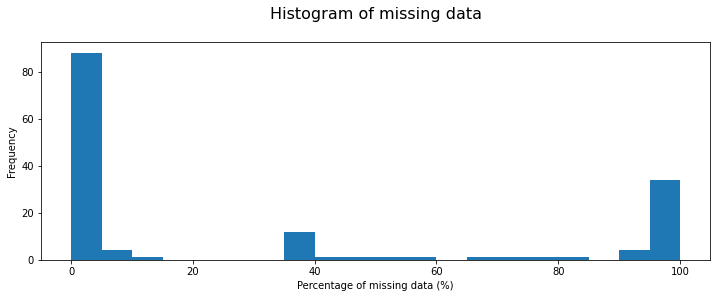

In [118]:
%matplotlib inline
plt.figure(figsize=(12,4))
plt.title('Histogram of missing data\n', fontsize=16)
plt.xlabel('Percentage of missing data (%)')
plt.ylabel('Count')

# Setting the figure up:
missing_data.plot.hist(bins=20)

In [119]:
drop_columns = sorted(list(missing_data[missing_data > 25].index))

In [120]:
drop_columns
print(len(drop_columns))

58


In [121]:
df_Accepted.drop(labels=drop_columns, axis=1, inplace=True)

In [122]:
df_Accepted.shape

(2260701, 93)

In [123]:
Col_present = list(df_Accepted.columns)
Col_present

['id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'ch

In [124]:
Important_Features = ["loan_amnt", "term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc",
                      "loan_status","purpose","dti", "zip_code", "addr_state","fico_range_low","fico_range_high","pub_rec","application_type"]

Features_Need_to_be_Dropped = []
for i in Col_present:
  if i in Important_Features:
    pass
  else:
    Features_Need_to_be_Dropped.append(i)


print(Features_Need_to_be_Dropped)

['id', 'funded_amnt', 'funded_amnt_inv', 'verification_status', 'issue_d', 'pymnt_plan', 'url', 'title', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_

In [125]:
Important_Features = ["loan_amnt", "term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","loan_status","purpose","dti", "zip_code", "addr_state","fico_range_low","fico_range_high","pub_rec","application_type"]

Features_Need_to_be_Dropped = ['id', 'funded_amnt', 'funded_amnt_inv', 'verification_status', 'issue_d', 'pymnt_plan', 'url', 'title', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'hardship_flag', 'disbursement_method', 'debt_settlement_flag']

In [126]:
df_Accepted.drop(labels=Features_Need_to_be_Dropped, axis=1, inplace=True)

In [128]:
df_Accepted.shape

(2260701, 19)

In [129]:
df_Accepted["loan_status"].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [130]:
df_Accepted = df_Accepted.loc[df_Accepted["loan_status"].isin(["Fully Paid","Charged Off"])]
df_Accepted

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,loan_status,purpose,zip_code,addr_state,dti,fico_range_low,fico_range_high,pub_rec,application_type
0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Fully Paid,debt_consolidation,190xx,PA,5.91,675.0,679.0,0.0,Individual
1,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Fully Paid,small_business,577xx,SD,16.06,715.0,719.0,0.0,Individual
2,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Fully Paid,home_improvement,605xx,IL,10.78,695.0,699.0,0.0,Joint App
4,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Fully Paid,major_purchase,174xx,PA,25.37,695.0,699.0,0.0,Individual
5,11950.0,36 months,13.44,405.18,C,C3,Veterinary Tecnician,4 years,RENT,34000.0,Fully Paid,debt_consolidation,300xx,GA,10.20,690.0,694.0,0.0,Individual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260688,18000.0,60 months,9.49,377.95,B,B2,NaN,5 years,OWN,130000.0,Fully Paid,home_improvement,775xx,TX,20.59,735.0,739.0,0.0,Individual
2260690,29400.0,60 months,13.99,683.94,C,C3,Chief Operating Officer,9 years,MORTGAGE,180792.0,Fully Paid,debt_consolidation,900xx,CA,22.03,705.0,709.0,0.0,Individual
2260691,32000.0,60 months,14.49,752.74,C,C4,Sales Manager,3 years,MORTGAGE,157000.0,Charged Off,home_improvement,863xx,AZ,10.34,735.0,739.0,0.0,Individual
2260692,16000.0,60 months,12.79,362.34,C,C1,Manager,10+ years,RENT,150000.0,Fully Paid,medical,284xx,NC,12.25,665.0,669.0,4.0,Individual


In [132]:
df_Accepted.shape

(1345310, 19)

In [135]:
df_Accepted.nunique()

loan_amnt             1556
term                     2
int_rate               654
installment          83307
grade                    7
sub_grade               35
emp_title           378353
emp_length              11
home_ownership           6
annual_inc           64362
loan_status              2
purpose                 14
zip_code               943
addr_state              51
dti                   7067
fico_range_low          40
fico_range_high         40
pub_rec                 37
application_type         2
dtype: int64

In [136]:
df_Accepted.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title           85785
emp_length          78511
home_ownership          0
annual_inc              0
loan_status             0
purpose                 0
zip_code                1
addr_state              0
dti                   374
fico_range_low          0
fico_range_high         0
pub_rec                 0
application_type        0
dtype: int64

**loan amount**

In [137]:
df_Accepted["loan_amnt"].describe()

count    1.345310e+06
mean     1.441997e+04
std      8.717051e+03
min      5.000000e+02
25%      8.000000e+03
50%      1.200000e+04
75%      2.000000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64

In [138]:

df_Accepted.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,fico_range_low,fico_range_high,pub_rec
count,1.345310e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.344936e+06,1.345310e+06,1.345310e+06,1.345310e+06
mean,1.441997e+04,1.323962e+01,4.380755e+02,7.624764e+04,1.828267e+01,6.961850e+02,7.001852e+02,2.152760e-01
std,8.717051e+03,4.768716e+00,2.615126e+02,6.992510e+04,1.116045e+01,3.185251e+01,3.185316e+01,6.018647e-01
min,5.000000e+02,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,6.250000e+02,6.290000e+02,0.000000e+00
25%,8.000000e+03,9.750000e+00,2.484800e+02,4.578000e+04,1.179000e+01,6.700000e+02,6.740000e+02,0.000000e+00
50%,1.200000e+04,1.274000e+01,3.754300e+02,6.500000e+04,1.761000e+01,6.900000e+02,6.940000e+02,0.000000e+00
75%,2.000000e+04,1.599000e+01,5.807300e+02,9.000000e+04,2.406000e+01,7.100000e+02,7.140000e+02,0.000000e+00
max,4.000000e+04,3.099000e+01,1.719830e+03,1.099920e+07,9.990000e+02,8.450000e+02,8.500000e+02,8.600000e+01


**Interest Rate**

In [139]:

df_Accepted["int_rate"].describe()

count    1.345310e+06
mean     1.323962e+01
std      4.768716e+00
min      5.310000e+00
25%      9.750000e+00
50%      1.274000e+01
75%      1.599000e+01
max      3.099000e+01
Name: int_rate, dtype: float64

OUTLIER DETECTION USING INTER QURTILE RANGE:

In [141]:
Q1 = np.quantile(df_Accepted["int_rate"],0.25)
Q3 = np.quantile(df_Accepted["int_rate"],0.75)
IQR = Q3 - Q1

Low_outliers = Q1-1.5*IQR
High_outliers = Q3+1.5*IQR

print("Low_outliers :", round(Low_outliers,4))
print("High_outliers :", round(High_outliers,4))

print("Q1 :",Q1)
print("Q3 :", Q3)
print("IQR :", IQR)

Low_outliers : 0.39
High_outliers : 25.35
Q1 : 9.75
Q3 : 15.99
IQR : 6.24


OUTLIER DETECTION USING Z-SCORE TECHNIQUE:

Z score = (x -mean) / std. deviation 

In [142]:
data = df_Accepted["int_rate"] 
mean = round(np.mean(data) , 4)
std = round(np.std(data),4)
print('mean of the dataset is', mean) 
print('std. deviation is', std)


threshold = 3
outlier = [] 
for i in data: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i)

print('outlier in dataset is', outlier)

mean of the dataset is 13.2396
std. deviation is 4.7687
outlier in dataset is [27.99, 28.49, 28.99, 28.99, 28.49, 27.99, 28.99, 27.99, 27.99, 27.88, 28.99, 28.49, 28.49, 27.88, 27.88, 27.88, 28.49, 28.99, 27.88, 28.99, 28.49, 28.99, 27.88, 27.88, 28.49, 27.88, 27.88, 28.49, 28.49, 28.49, 27.88, 28.49, 27.88, 27.88, 28.49, 28.49, 27.88, 27.88, 27.88, 28.99, 28.49, 28.49, 28.99, 27.88, 28.49, 28.49, 27.88, 27.88, 28.99, 28.49, 27.88, 28.49, 28.99, 27.88, 27.88, 27.88, 27.88, 27.88, 27.88, 27.88, 28.49, 28.49, 27.88, 27.88, 28.49, 28.99, 27.88, 28.49, 28.99, 27.88, 28.99, 27.88, 28.49, 28.49, 27.88, 27.88, 27.88, 27.88, 27.88, 28.49, 27.88, 27.88, 27.88, 27.88, 28.99, 28.49, 27.88, 27.88, 28.99, 27.88, 27.88, 27.88, 28.99, 27.88, 27.88, 28.49, 28.99, 28.49, 28.49, 28.49, 28.49, 28.49, 27.88, 28.99, 28.49, 27.88, 28.49, 28.99, 27.88, 28.99, 28.99, 27.88, 27.88, 28.99, 27.88, 28.49, 27.88, 27.88, 28.49, 28.99, 27.88, 27.88, 28.99, 27.88, 27.88, 28.99, 27.88, 27.88, 27.88, 28.49, 27.88, 28.4

In [143]:
min(outlier)

27.79

In [144]:
df_Accepted["loan_status"][df_Accepted["int_rate"]>=27.79].value_counts()

Charged Off    4916
Fully Paid     4848
Name: loan_status, dtype: int64

In [145]:

outlier_interest_rate = df_Accepted[df_Accepted["int_rate"]>=27.79].index

In [146]:
outlier_interest_rate_Remove = []
for i in outlier_interest_rate:
  outlier_interest_rate_Remove.append(i)

print(outlier_interest_rate_Remove)
print(len(outlier_interest_rate_Remove))

[809, 878, 2668, 2746, 4029, 4807, 5747, 6680, 6961, 7090, 7975, 9879, 11111, 11804, 13348, 14532, 15004, 15046, 15371, 15374, 16493, 16634, 16862, 18050, 19480, 21144, 21170, 21495, 22271, 23121, 24063, 25548, 25629, 25949, 26276, 27260, 27810, 28096, 28224, 28635, 30254, 31425, 31627, 32405, 32460, 33589, 34356, 34411, 35228, 35256, 35731, 36350, 36598, 36674, 36871, 37395, 38881, 39271, 39871, 40645, 41075, 41290, 41739, 41920, 42027, 44216, 44630, 45620, 45977, 46433, 46531, 47530, 47740, 47829, 47986, 49499, 49735, 50667, 51036, 51427, 53269, 55114, 55651, 56560, 56876, 57138, 58383, 58640, 58649, 59103, 59832, 60264, 60330, 60340, 61092, 61434, 62497, 64171, 65195, 65937, 66223, 67498, 68191, 69893, 69903, 73448, 74255, 74320, 75901, 78064, 78954, 83832, 84256, 84851, 86145, 86589, 87792, 89833, 90824, 91955, 92648, 95035, 95171, 97708, 97963, 99449, 99954, 100679, 100863, 101010, 102780, 103030, 103190, 103363, 105017, 105178, 105779, 106222, 108315, 108703, 109618, 110593, 1108

In [147]:
df_Accepted.drop(outlier_interest_rate_Remove, axis=0, inplace=True)

In [148]:

df_Accepted.shape

(1335546, 19)


ANNUAL INCOME

In [149]:
df_Accepted["annual_inc"].describe()

count    1.335546e+06
mean     7.627045e+04
std      7.007478e+04
min      0.000000e+00
25%      4.576000e+04
50%      6.500000e+04
75%      9.000000e+04
max      1.099920e+07
Name: annual_inc, dtype: float64

In [150]:
Q1 = np.quantile(df_Accepted["annual_inc"],0.25)
Q3 = np.quantile(df_Accepted["annual_inc"],0.75)
IQR = Q3 - Q1

Low_outliers = Q1-1.5*IQR
High_outliers = Q3+1.5*IQR

print("Q1 :",Q1)
print("Q3 :", Q3)
print("IQR :", IQR)
print("Low_outliers :", round(Low_outliers,4))
print("High_outliers :", round(High_outliers,4))

Q1 : 45760.0
Q3 : 90000.0
IQR : 44240.0
Low_outliers : -20600.0
High_outliers : 156360.0


OUTLIER DETECTION USING Z-SCORE TECHNIQUE:

Z score = (x -mean) / std. deviation

In [151]:
data = df_Accepted["annual_inc"]
mean = round(np.mean(data) , 4)
std = round(np.std(data),4)
print('mean of the dataset is', mean) 
print('std. deviation is', std)

threshold1 = -3
threshold2 =  3
outlier_annual_income = [] 
for i in data: 
    z = (i-mean)/std 
    if z < threshold1 or z > threshold2: 
        outlier_annual_income.append(i)

print("outliers in the dataset :", outlier_annual_income)

mean of the dataset is 76270.4529
std. deviation is 70074.7519
outliers in the dataset : [297000.0, 300000.0, 450000.0, 300000.0, 415000.0, 650000.0, 300000.0, 300000.0, 295000.0, 296000.0, 350000.0, 450000.0, 370000.0, 300000.0, 400000.0, 525000.0, 425000.0, 333600.0, 675000.0, 300000.0, 370000.0, 290000.0, 520000.0, 350000.0, 450000.0, 300000.0, 400000.0, 600000.0, 300000.0, 350000.0, 350000.0, 300000.0, 325000.0, 550000.0, 300000.0, 300000.0, 430000.0, 600000.0, 369000.0, 750000.0, 305000.0, 374000.0, 1400000.0, 400000.0, 300000.0, 424000.0, 3964280.0, 450000.0, 400000.0, 300000.0, 1000000.0, 400000.0, 300000.0, 550000.0, 320000.0, 350000.0, 300000.0, 360000.0, 594000.0, 300000.0, 325000.0, 300000.0, 400000.0, 396000.0, 300000.0, 400000.0, 315000.0, 350000.0, 475000.0, 500000.0, 300000.0, 306000.0, 2300000.0, 300000.0, 385000.0, 450000.0, 400000.0, 400000.0, 300000.0, 550000.0, 305000.0, 425000.0, 400000.0, 400000.0, 370000.0, 350000.0, 399000.0, 320000.0, 300000.0, 305000.0, 300000

In [152]:
print(min(outlier_annual_income))
print(len(outlier_annual_income))

286800.0
9964


In [153]:
Outlier_Annual_inc = (df_Accepted[df_Accepted["annual_inc"]>=286800.0].index)
Outlier_Annual_inc

Int64Index([    213,     557,     651,    1089,    1122,    1482,    1487,
               1694,    2028,    2069,
            ...
            2259257, 2259331, 2259556, 2259605, 2259800, 2260011, 2260306,
            2260340, 2260416, 2260582],
           dtype='int64', length=9964)

In [154]:
Outlier_Annual_inc_Remove = []

for i in Outlier_Annual_inc:
  Outlier_Annual_inc_Remove.append(i)

print(Outlier_Annual_inc_Remove)

[213, 557, 651, 1089, 1122, 1482, 1487, 1694, 2028, 2069, 2145, 2224, 2277, 2303, 2329, 2928, 2982, 3072, 3386, 3561, 3577, 3678, 3709, 3718, 3764, 4185, 4672, 4723, 4899, 5020, 5110, 5290, 5308, 5331, 5363, 5614, 5745, 5828, 6386, 6402, 6508, 6704, 6975, 7082, 7173, 7199, 7239, 7421, 7431, 7595, 7666, 7686, 7782, 8055, 8196, 8207, 8243, 8350, 8420, 8427, 8560, 8582, 8607, 8660, 8834, 9018, 9233, 9236, 9390, 9452, 9727, 9766, 10404, 10604, 10797, 10836, 11100, 11128, 11139, 11517, 11842, 11843, 11970, 12004, 12097, 12164, 12224, 12484, 12494, 12504, 13254, 13303, 13344, 13670, 13736, 13751, 13823, 14158, 14250, 14312, 14330, 14977, 14987, 15048, 15062, 15267, 15487, 15707, 15722, 15732, 15800, 15859, 15920, 16027, 16256, 16486, 16729, 16787, 16792, 16795, 16810, 17311, 17375, 17475, 17488, 17619, 17723, 17736, 17967, 18060, 18481, 18513, 18535, 18598, 18618, 18991, 19074, 19142, 19227, 19238, 19410, 19500, 19637, 19986, 20151, 20159, 20225, 20370, 20546, 20614, 20807, 20857, 20872, 214

In [156]:
df_Accepted.shape

(1335546, 19)

In [158]:
df_Accepted.drop(Outlier_Annual_inc_Remove, axis=0, inplace=True)

Debt-to-income
DTI= (Total of Monthly Debt Payments / Gross Monthly Income)

In [160]:
df_Accepted["dti"].isnull().sum()

361

In [161]:
df_Accepted["loan_status"][df_Accepted["dti"].isnull()].value_counts()

Fully Paid     295
Charged Off     66
Name: loan_status, dtype: int64

In [162]:
df_Accepted.dropna(subset=["dti"], axis=0, inplace=True)

In [163]:
df_Accepted.shape

(1325221, 19)


OUTLIER DETECTION USING INTER QURTILE RANGE

In [164]:
Q1 = np.quantile(df_Accepted["dti"],0.25)
Q3 = np.quantile(df_Accepted["dti"],0.75)
IQR = Q3 - Q1

Low_outliers = Q1-1.5*IQR
High_outliers = Q3+1.5*IQR

print("Q1 :",Q1)
print("Q3 :", Q3)
print("IQR :", IQR)
print("Low_outliers :", round(Low_outliers,4))
print("High_outliers :", round(High_outliers,4))

Q1 : 11.86
Q3 : 24.06
IQR : 12.2
Low_outliers : -6.44
High_outliers : 42.36


In [165]:
data = df_Accepted["dti"] 
mean = round(np.mean(data) , 4)
std = round(np.std(data),4)
print('mean of the dataset is', mean) 
print('std. deviation is', std)


threshold1 = -3
threshold2 =  3
outlier = [] 
for i in data: 
    z = (i-mean)/std 
    if z < threshold1 or z > threshold2: 
        outlier.append(i)

print('outlier in the dataset:', outlier)
print('DTI threshold:', min(outlier))
print('Length of the outlier:', len(outlier))

mean of the dataset is 18.3107
std. deviation is 11.0569
outlier in the dataset: [83.64, 999.0, 83.4, 137.4, 89.83, 52.8, 58.54, 59.18, 59.26, 100.09, 68.41, 52.45, 90.0, 57.14, 69.35, 54.1, 120.66, 54.36, 54.19, 61.21, 67.5, 380.53, 59.26, 672.52, 63.64, 125.25, 64.99, 60.08, 71.4, 68.3, 104.0, 54.43, 58.43, 63.0, 112.2, 78.64, 60.99, 60.2, 93.0, 531.33, 57.49, 359.69, 66.61, 55.52, 59.83, 51.98, 53.15, 110.9, 72.67, 65.24, 55.87, 54.22, 99.18, 108.71, 79.59, 69.47, 51.99, 53.4, 117.71, 86.31, 55.11, 53.23, 56.46, 55.28, 549.53, 92.29, 55.62, 56.0, 61.46, 251.6, 65.84, 52.81, 94.12, 52.28, 61.4, 64.82, 62.85, 288.08, 60.06, 54.4, 65.22, 65.73, 112.32, 65.8, 54.2, 62.83, 56.62, 59.59, 209.1, 97.03, 57.84, 460.21, 67.68, 55.4, 70.28, 999.0, 55.78, 75.87, 75.54, 71.63, 58.4, 116.21, 51.97, 131.35, 59.97, 58.95, 54.98, 54.22, 63.39, 62.66, 106.03, 70.54, 57.31, 75.4, 75.25, 57.68, 62.16, 131.1, 129.11, 77.27, 56.62, 90.29, 61.97, 82.27, 142.16, 60.33, 94.29, 62.92, 71.59, 67.35, 55.22, 77

In [167]:
df_Accepted['grade'].unique()

array(['C', 'B', 'F', 'A', 'E', 'D', 'G'], dtype=object)

In [168]:
df_Accepted[df_Accepted['grade'] == 'A'].describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,232051.0,13746.570366,7945.978729,500.00,7800.00,12000.00,19725.00,40000.00
int_rate,232051.0,7.115602,0.999162,5.31,6.49,7.26,7.89,9.63
installment,232051.0,419.312833,242.943129,14.77,234.99,367.74,572.26,1268.46
annual_inc,232051.0,84126.986792,43592.177646,20.00,53000.00,75000.00,103000.00,286400.00
dti,232051.0,15.697468,8.992037,0.00,10.00,15.06,20.79,999.00
fico_range_low,232051.0,727.464243,36.774540,660.00,700.00,720.00,750.00,845.00
fico_range_high,232051.0,731.464833,36.776435,664.00,704.00,724.00,754.00,850.00
pub_rec,232051.0,0.110730,0.440406,0.00,0.00,0.00,0.00,37.00


In [169]:
df_Accepted['sub_grade'].unique()

array(['C4', 'C1', 'B4', 'F1', 'C3', 'B2', 'B1', 'A2', 'B5', 'C2', 'E2',
       'A4', 'E3', 'C5', 'A1', 'D4', 'F3', 'D1', 'B3', 'D3', 'D5', 'A5',
       'F2', 'E4', 'D2', 'E1', 'F5', 'E5', 'A3', 'G2', 'G1', 'F4', 'G4',
       'G3', 'G5'], dtype=object)

In [171]:
import matplotlib.ticker as mticker

def plot_var(col_name, full_name, df=df_Accepted, continuous=True, rotation=0, alignment='center'):
    """
    
    """
    
    # Set up figure space:
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4), dpi=90)
    sn.set(palette='bright')
    
    # Set the font options for the x/y axes labels:
    #font.set_style('italic')
    
    # Plot distribution of the variable without showing charge off rate
    if continuous:
        # Show a histogram to visualise variable
        sn.histplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1, bins=30)
    else:
        x_labels = df[col_name].sort_values().unique()
        sn.countplot(x=df[col_name], order=sorted(df[col_name].unique()), ax=ax1).set_xticklabels(x_labels, rotation=rotation, horizontalalignment=alignment)
    
    # Formatting the x labels
    ax1.set_xlabel(full_name)
    
    # Formatting the y labels
    y_labels_1 = ['{:,.0f}'.format(x) + 'K' for x in ax1.get_yticks()/1000]
    ax1.yaxis.set_major_locator(mticker.FixedLocator(ax1.get_yticks().tolist()))
    ax1.set_yticklabels(y_labels_1)
    ax1.set_ylabel('Count')
    # Formatting the title
    ax1.set_title(full_name+"\n", fontweight='bold')

    # Plot distribution of variable split by loan status 
    if continuous:
        sn.boxplot(x=col_name, y='loan_status', data=df, ax=ax2)
        ax2.set_ylabel('Loan status')
        ax2.set_title(full_name + ' by loan status'+"\n", fontweight='bold')
    else:
        charge_off_rates = df.groupby(col_name)['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
        sn.barplot(x=charge_off_rates.index, y=charge_off_rates.values, ax=ax2)
        
        # Formatting the x-axis
        ax2.set_xticklabels(charge_off_rates.index,rotation=rotation, horizontalalignment=alignment)
        
        # Formatting the y-axis
        y_labels_2 = ['{:,.0f}'.format(x) + '%' for x in ax2.get_yticks()*100]
        ax2.yaxis.set_major_locator(mticker.FixedLocator(ax2.get_yticks().tolist()))
        ax2.set_yticklabels(y_labels_2)
        ax2.set_ylabel('Proportion of loans charged off')

        # Formatting the title 
        ax2.set_title('Charge off rate by ' + full_name+"\n", fontweight='bold')
    
    ax2.set_xlabel(full_name)
    
    plt.tight_layout()

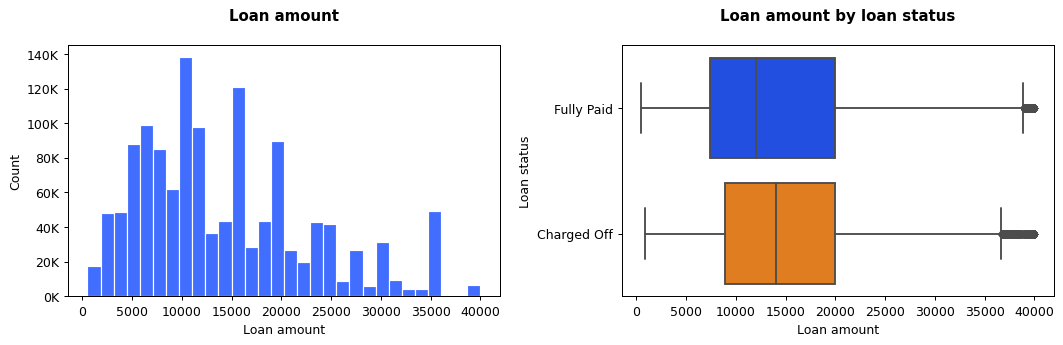

In [176]:
plot_var('loan_amnt', 'Loan amount')

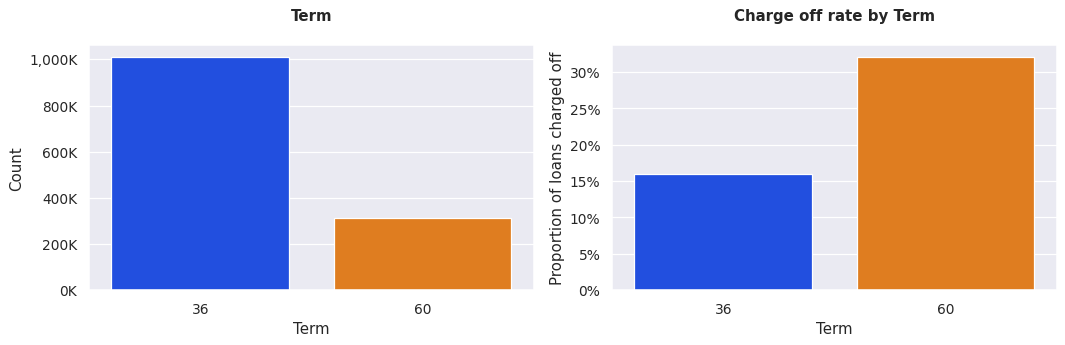

In [177]:
df_Accepted['term'] = df_Accepted.term.map({' 36 months': 36, ' 60 months': 60})
plot_var('term', 'Term', continuous=False)

In [179]:
rejected_filepath="/content/drive/MyDrive/rejected_2007_to_2018Q4.csv.gz"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [180]:
data_reject=pd.read_csv(rejected_filepath)

In [181]:
data_reject.shape

(27648741, 9)

In [182]:
data_reject.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0


In [183]:
data_reject.tail()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
27648736,10000.0,2016-12-31,Debt consolidation,590.0,41.26%,441xx,OH,< 1 year,0.0
27648737,10000.0,2016-12-31,moving,NaN,1.48%,207xx,MD,5 years,0.0
27648738,1200.0,2016-12-31,Other,686.0,10.26%,914xx,CA,< 1 year,0.0
27648739,25000.0,2016-12-31,debt_consolidation,NaN,17.71%,880xx,NM,< 1 year,0.0
27648740,15000.0,2016-12-31,Business,684.0,10.58%,113xx,NY,< 1 year,0.0


In [184]:
data_reject.isnull().sum()

Amount Requested               0
Application Date               0
Loan Title                  1303
Risk_Score              18497630
Debt-To-Income Ratio           0
Zip Code                     293
State                         22
Employment Length         951355
Policy Code                  918
dtype: int64

In [185]:
data_reject.columns

Index(['Amount Requested', 'Application Date', 'Loan Title', 'Risk_Score',
       'Debt-To-Income Ratio', 'Zip Code', 'State', 'Employment Length',
       'Policy Code'],
      dtype='object')

In [186]:

data_reject.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27648741 entries, 0 to 27648740
Data columns (total 9 columns):
 #   Column                Non-Null Count     Dtype  
---  ------                --------------     -----  
 0   Amount Requested      27648741 non-null  float64
 1   Application Date      27648741 non-null  object 
 2   Loan Title            27647438 non-null  object 
 3   Risk_Score            9151111 non-null   float64
 4   Debt-To-Income Ratio  27648741 non-null  object 
 5   Zip Code              27648448 non-null  object 
 6   State                 27648719 non-null  object 
 7   Employment Length     26697386 non-null  object 
 8   Policy Code           27647823 non-null  float64
dtypes: float64(3), object(6)
memory usage: 1.9+ GB


In [187]:
data_reject.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount Requested,27648741.0,13133.240309,15009.636325,0.0,4800.0,10000.0,20000.0,1400000.0
Risk_Score,9151111.0,628.172090,89.936793,0.0,591.0,637.0,675.0,990.0
Policy Code,27647823.0,0.006375,0.112737,0.0,0.0,0.0,0.0,2.0


In [188]:
bool_series = pd.isnull(data_reject["Risk_Score"])
data_reject[bool_series] .head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
132,3000.0,2007-06-09,lmhsfan,NaN,9.26%,805xx,CO,< 1 year,0.0
160,12000.0,2007-06-12,Tony_Texan,NaN,100%,802xx,CO,< 1 year,0.0
205,4000.0,2007-06-19,ThePegLeg,NaN,100%,796xx,TX,< 1 year,0.0
310,1000.0,2007-06-27,Help rebuild Galveston,NaN,100%,701xx,TX,10+ years,0.0
543,7500.0,2007-07-23,Sm-biz owner seeks loan,NaN,100%,891xx,NV,3 years,0.0


In [189]:
new_data1 = data_reject.dropna(axis = 0, how ='any')  
new_data1.shape

(8992195, 9)

In [190]:
print("Old data frame length:", len(data_reject)) 
print("New data frame length:", len(new_data1))  
print("Number of rows with at least 1 NA value: ", (len(data_reject)-len(new_data1)))

Old data frame length: 27648741
New data frame length: 8992195
Number of rows with at least 1 NA value:  18656546


In [191]:

new_data1.isnull().sum()

Amount Requested        0
Application Date        0
Loan Title              0
Risk_Score              0
Debt-To-Income Ratio    0
Zip Code                0
State                   0
Employment Length       0
Policy Code             0
dtype: int64

In [192]:
def removeNulls(dataframe, axis =1, percent=0.3):
    '''
    
    '''
    df = dataframe.copy()
    ishape = df.shape
    if axis == 0:
        rownames = df.transpose().isnull().sum()
        rownames = list(rownames[rownames.values > percent*len(df)].index)
        df.drop(df.index[rownames],inplace=True) 
        print("\nNumber of Rows dropped\t: ",len(rownames))
    else:
        colnames = (df.isnull().sum()/len(df))
        colnames = list(colnames[colnames.values>=percent].index)
        df.drop(labels = colnames,axis =1,inplace=True)        
        print("Number of Columns dropped\t: ",len(colnames))
         
    print("\nOld dataset rows,columns",ishape,"\nNew dataset rows,columns",df.shape)

    return df

In [193]:
data_reject = removeNulls(data_reject, axis =1,percent = 0.3)

Number of Columns dropped	:  1

Old dataset rows,columns (27648741, 9) 
New dataset rows,columns (27648741, 8)


**CORRELATION OF ATTRIBUTES**

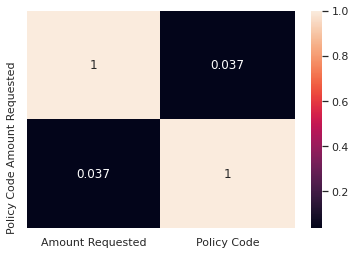

In [194]:
corelation=data_reject.corr()
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

In [ ]:
sns.catplot(x='Amount Requested',kind='box',data=data_reject)

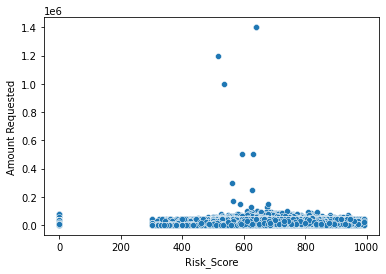

In [ ]:
import matplotlib.pyplot as plt
sns.scatterplot(x=data_reject['Risk_Score'],y=data_reject['Amount Requested'])